# Домашнее задание

Максимовская Анастасия, БЭК-155

Перед тем, как начать выполнять задание, необходимо загрузить данные. В моем случае это "Товарная структура экспорта и импорта", а также "Основные показатели деятельности малых предприятий", 2011 год. В файлах, которые я загружаю, уже удалены значения по федеральным округам, т.к. это сумма значений по областям (если их не выкинуть, одни и те же значения будут учтены 2 раза, а это выброс) и выполнена предобработка.

small_business - данные по основным показателям деятельности малых предприятий

product - данные по товарной структуре экспорта

In [334]:
#импортируем библиотеки
import pandas as pd
import numpy as np

#загрузим датасеты и посмотрим на их "шапки", чтобы понять структуру данных
business = pd.read_excel('small_b.xlsx', header=None, names=['oblast', 'number'])
product = pd.read_excel('product_structure.xlsx', header=None, names=['oblast', 'product'])

In [335]:
business.head()

,oblast,number
0,Белгородская область,106
1,Брянская область,55
2,Владимирская область,114
3,Воронежская область,83
4,Ивановская область,82


Столбец "oblast" означает область, "business" - число малых предприятий на 10000 человек населения.

In [336]:
product.head()

,oblast,product
0,Белгородская область,123.3
1,Брянская область,5.7
2,Владимирская область,46.2
3,Воронежская область,84.5
4,Ивановская область,0.7


Столбец "oblast" означает область, "product" - экспорт продовольственных товаров и сельскохозяйственного сырья. Данные за 2011 год.

Теперь введем переменные:

Y = объем экспорта сельскохозяйственных товаров и продовольственного сырья

X = число малых предприятий на 1000 человек населения

In [338]:
Y = product['product']
X = business['number']

## 1. Сформулировать задачу исследования

ЗАДАЧА: Исследование данных по объему экспорта продовольственных товаров и сельскохозяйственного сырья и по количеству малых предприятий на 10000 человек и проверка на зависимость объема экспорта от количества малых предприятий.

## 2. Составить гипотезы (предположения) (не менее 2) простого вида для проверки

Гипотеза 1:
Объем экспорта продовольственных товаров и сельскохозяйственного сыырья положительно зависит от количества малых предприятий на 10000 человек.

Гипотеза 2: Объемы экспорта по Москве больше, чем средние объемы экспорта продовольственных товаров и сельскохозяйственного сырья по стране.


## 3. Представить описательные статистики данных, написать вывод

1) Математическое ожидание - среднее значение случайной величины.

Высчитывается по формуле: $$\bar{X} = \frac{\sum\limits_{i=1}^{n} X_i}{n}$$

Посчитаем мат. ожидание для X и Y:

In [339]:
mean_1 = np.mean(X)
mean_2 = np.mean(Y)
print('Мат. ожидание объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', mean_2, 'Мат. ожидание числа малых предприятий на 10000 человек населения:', mean_1, sep='\n')

Мат. ожидание объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
102.32692307692307
Мат. ожидание числа малых предприятий на 10000 человек населения:
95.83333333333333


2) Стандартное отклонение - это показатель рассеивания значений случайной величины относительно  её математического ожидания.

Высчитывается по формуле: $$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(X_{i} - \bar{X}\right)^{2}} {n-1}} $$

Посчитаем стандартное отклонение для X и Y:

In [340]:
std_1 = np.std(X)
std_2 = np.std(Y)
print('Стандартное отклонение объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', std_2, 'Стандартное отклонение числа малых предприятий на 1000 человек населения:', std_1, sep='\n')

Стандартное отклонение объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
232.8413213796353
Стандартное отклонение числа малых предприятий на 1000 человек населения:
49.250385047737744


3) Минимальное и максимальное значения

Посчитаем минимум и максим для наших переменных:

In [341]:
min_1 = min(Y)
max_1 = max(Y)
print('Минимальный объем экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', min_1, 'Максимальный объем экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', max_1, sep='\n')

Минимальный объем экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
0.0
Максимальный объем экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
1251.7


In [342]:
min_2 = min(X)
max_2 = max(X)
print('Минимальное число малых предприятий на 1000 человек населения:', min_2, 'Максимальное число малых предприятий на 1000 человек населения', max_2, sep='\n')

Минимальное число малых предприятий на 1000 человек населения:
15
Максимальное число малых предприятий на 1000 человек населения
366


Проверим, в каких регионах достигаются указанные минимумы и максимумы:

In [343]:
product.loc[product['product'].idxmax()]

oblast     г. Москва
product       1251.7
Name: 17, dtype: object

In [344]:
product.loc[product['product'].idxmin()]

oblast     Республика Калмыкия
product                      0
Name: 29, dtype: object

Минимальное значение экспорта продовольственных товаров и сельскохозяйственного сырья в миллионах долларов США - 0.0 в республике Калмыкия. Максимальное - в городе Москва.

In [345]:
business.loc[business['number'].idxmax()]

oblast    г. Санкт-Петербург
number                   366
Name: 27, dtype: object

In [346]:
business.loc[business['number'].idxmin()]

oblast    Республика Дагестан
number                     15
Name: 34, dtype: object

Максимальное количество малых предприятий на 10000 человек населения достигается в городе Санкт-Петербурге (366), минимальное - республике Дагестан (15).

In [347]:
range_1 = max_1 - min_1
range_2 = max_2 - min_2
print('Размах объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', range_1, 'Размах количества малых предприятий на 10000 человек населения:', range_2, sep='\n')

Размах объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
1251.7
Размах количества малых предприятий на 10000 человек населения:
351


4) Медиана - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

Считаем медиану для наших переменных:

In [348]:
median_1 = np.median(Y)
median_2 = np.median(X)
print('Медиана объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', median_1, 'Медиана количества малых предприятий на 10000 человек населения:', median_2, sep='\n')

Медиана объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
14.1
Медиана количества малых предприятий на 10000 человек населения:
91.5


5) Дисперсия - мера разброса значений случайной величины относительно ее математического ожидания.

Дисперсия считается по формуле: $$ \sigma^2 = {\frac{\sum\limits_{i=1}^{n} \left(X_{i} - \bar{X}\right)^{2}} {n-1}}$$

Считаем дисперсию для наших переменных:

In [349]:
var_1 = Y.var()
var_2 = X.var()
print('Дисперсия объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):', var_1, 'Дисперсия количества малых предприятий на 10000 человек населения:', var_2, sep='\n')

Дисперсия объема экспорта сельскохозяйственных товаров и продовольственного сырья (в долларах США):
54919.172902097926
Дисперсия количества малых предприятий на 10000 человек населения:
2457.101731601734


#### Выводы:

Анализируя полученные выше значения описательных статистик, можно сказать, что в среднем, малых предприятий примерно в 100 раз меньше, чем число людей (96 на 10000 человек населения). Стандартное отклонение показывает, что отклонения могут достигать примерно половины этого числа (49). Случаются сильно отходящие от среднего случаи: где количество малых предприятий на 10000 человек населения в 3,8 раза больше (366 в городе Санкт-Петербург) и в 6 раз меньше (15 в республике Дагестан), что является самым низким показателем по России в 2011 году. При этом, медиана числа малых предприятий на 10000 человек населения (91,5) не сильно отличается от среднего. Можно предположить, что количество малых предприятий - это нормально распределенная величина.

Среднее количество экспорта продовольственных товаров и сельскохозяйственного сырья - 102 (измеряется в миллионах долларов США). Стандартное отклонение в этом случае достаточно велико (233), на основании чего можно предположить что объемы экспорта неравномерно распределены по стране. Об этом же нам говорит и полученное выше значение размаха, разницы между максимумом и минимумом, - 1252. Это можно объяснить большой разницей в развитии регионов (например, Москвы и более отдаленных регионов). Медиана (14) лежит достаточно далеко от среднего (102).

# 4. Представить графическое исследование распределения значений числовых показателей

Теперь построим графики распределения значений объемов экспорта продовольственных товаров и сельскохозяйственного сырья и числа малых предприятий на 10000 человек населеня на 2011 год.

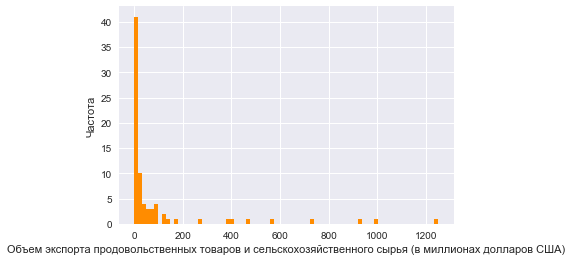

In [350]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(Y, bins=76, color='darkorange')
plt.xlabel('Объем экспорта продовольственных товаров и сельскохозяйственного сырья (в миллионах долларов США)')
plt.ylabel('Частота')

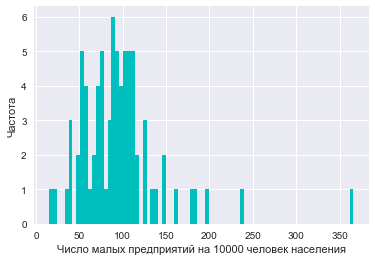

In [351]:
plt.hist(X, bins=78, color='c')
plt.xlabel('Число малых предприятий на 10000 человек населения')
plt.ylabel('Частота')

Далее строим графики плотностей:

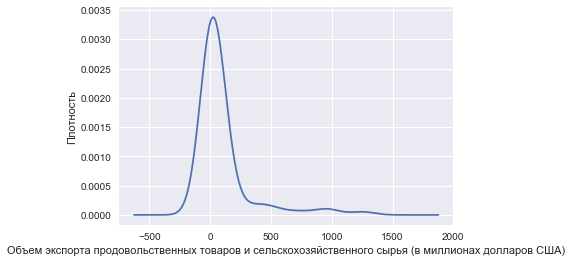

In [352]:
Y.plot.density()
plt.xlabel('Объем экспорта продовольственных товаров и сельскохозяйственного сырья (в миллионах долларов США)')
plt.ylabel('Плотность')

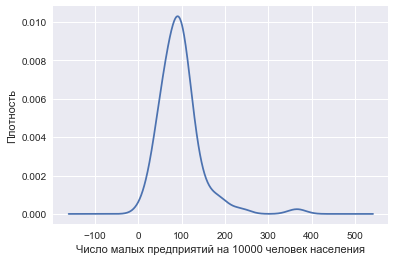

In [353]:
X.plot.density()
plt.xlabel('Число малых предприятий на 10000 человек населения')
plt.ylabel('Плотность')

Судя по графику, число малых предприятий имеет вид хи-квадрат распределения, а объем экспорта продовольственных товаров и сельскохозяйственнного сырья - нормального распределения, как и предполагалось ранее.

## 5. Охарактеризовать взаимосвязи переменных (матрицы корреляции, графики)

Найдем корреляцию между нашими переменными Y и X:

In [354]:
corr = Y.corr(X)
corr

0.41448033226146841

Коэффициент корреляции равен 0.41, что говорит о несильной положительной взаимосвязи между величинами. То есть, количество малых предприятий на 10000 человек населения немного влияет на объемы экспорта продовольственных товаров и сельскохозяйственного сырья.

In [355]:
frame = pd.read_excel('concat.xlsx', header=None, names = ['oblast', 'number', 'product'])

Матрица корреляции будет выглядеть так:

In [356]:
matrix = frame.corr()
matrix

,number,product
number,1.00000,0.41448
product,0.41448,1.00000


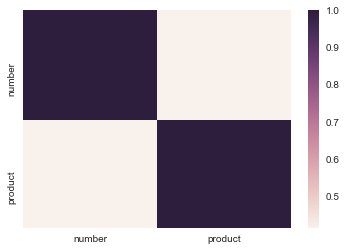

In [357]:
import seaborn as sns
corr = frame.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Также можно построить диаграмму рассеяния:

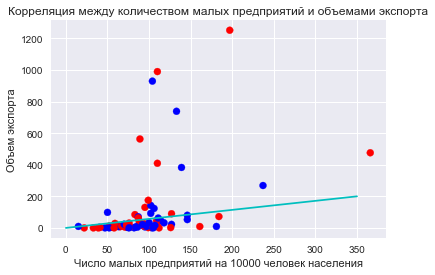

In [358]:
plt.scatter(X, Y, c = ['b','r'])
plt.xlabel('Число малых предприятий на 10000 человек населения')
plt.ylabel('Объем экспорта')
plt.title('Корреляция между количеством малых предприятий и объемами экспорта')
plt.plot([lineStart, 350], [lineStart, 200], 'k-', color = 'c')

Красным на графике выделен экспорт, синим - число малых предриятий.

Возможно, линейная корреляция будет не лучшим описанием взаимосвязи переменных, но нельзя отрицать, что определенная корреляция между переменными наблюдается.

## 6. Написать вывод по предположениям, сформулированным в начале 

###### Гипотеза 1:  
 Как видно из графиков и коэффициентов корреляции выше, между объемом экспорта продовольственных товаров и сельскохозяйственного сырья и числом малых предприятий на 10000 человек населения наблюдается небольшая положительная зависимость. Нельзя сказать, что количество малых предприятий полностью объясняет объемы экспорта в разных областях, но и сказать, что это независимые переменные, нельзя.

###### Гипотеза 2:
Мы получили, что максимальный объем экспорта продовольственных товаров и сельскохозяйственного сырья достигается в Москве и значительно превышает средний объем экспорта по стране (1252 против 102 миллионов долларов США).

## 7. Проверить гипотезу о среднем значении зависимого показателя, превосходящем медианное значение признака по результатам предыдущего исследования 

Формалиузем гипотезу:

H0: Среднее значение объемов экспорта продовольственных товаров и сельскохозяйственного сырья меньше или равно медиане объемов экспорта продовольственных товаров и сельскохозяйственного сырья.

H1: Среднее значение объемов экспорта продовольственных товаров и сельскохозяйственного сырья больше медианы объемов экспорта продовольственных товаров и сельскохозяйственного сырья.

Стандартное отклонение уже было посчитано выше, поэтому используем статистику z, которая считается по формуле:
$$z = \frac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}} $$

В 3 пункте уже были посчитаны значения зависимой переменной Y (объема экспорта):

In [359]:
print('Cреднее:', mean_2, 'Cтандартное отклонение:', std_2, 'Mедиана:', median_1, sep='\n')

Cреднее:
102.32692307692307
Cтандартное отклонение:
232.8413213796353
Mедиана:
14.1


Рассчитаем z-статистику по указанной формуле:

In [360]:
n = len(Y)
n

78

In [361]:
n_2 = n**0.5
znam = std_2/n_2
z = (mean_2 - median_1) / znam
print('z =', z)

z = 3.34648112272


Из курса математической статистики известно, что критическое значение z при уровне доверия 0.95 примерно равно 1.65.

В нашем случае, тестовое значение превысило критическое. То есть, при уровне доверия 95% гипотезу о том, что среднее значение объемов экспорта продовольственных товаров и сельскохозяйственного сырья меньше или равно медиане объемов экспорта продовольственных товаров и сельскохозяйственного сырья, можно отвергнуть. Значит, присутствует смещение данных.